In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import *

In [2]:
def load_subj_behav_dict(sub_n):
  """ behav_dict {wedding : behav_code_array}
  wedding: string e.g. "W4"
  behav_code_array: 1D np array 
    entries are behavioral codes 1-9
  """
  sub_df = pd.read_csv('behav/from_silvy/recallTranscriptions/S%i.csv'%sub_n).fillna(0)
  # wedding order
  wedding_order = sub_df.values[:,0]
  # dict {wedding:array_with_behavioral_code}
  D = {}
  for wed_n in range(N_WEDDINGS):
    D[wedding_order[wed_n]] = sub_df.values[wed_n,1:]
  return D

def load_behav(sub_n,wed_s):
  behavD = load_subj_behav_dict(sub_n)
  return behavD[wed_s]
  

In [3]:
## make behavioral dataframe
dfL = []
for wed_s in WED_L:
  for sub_n in ALL_SUB_NS:
    behav_arr = load_behav(sub_n,wed_s)
    sub_df = pd.DataFrame(data=behav_arr,columns=['behavior'])
    sub_df['wedding'] = np.repeat(wed_s,behav_arr.shape)
    sub_df['sub'] = np.repeat(sub_n,behav_arr.shape)
    sub_df['time'] = np.arange(len(behav_arr))
    dfL.append(sub_df)
  group_df = pd.concat(dfL)
group_df

,behavior,wedding,sub,time
0,0,W1,2,0
1,0,W1,2,1
2,0,W1,2,2
3,0,W1,2,3
4,0,W1,2,4
...,...,...,...,...
235,0,W38,44,235
236,0,W38,44,236
237,0,W38,44,237
238,0,W38,44,238


In [4]:
# subjects and weddings where schema was mentioned
schema_mention_D = {}
grouping_obj = group_df[group_df['behavior']==1].groupby('sub')
for sub_n_,df_ in grouping_obj:
  print('sub:',sub_n_, df_['wedding'].unique())
  schema_mention_D[sub_n_] = df_['wedding'].unique()
  
zero_schema_mention_subs = [item for item in ALL_SUB_NS if item not in list(schema_mention_D.keys())]

sub: 3 ['W2' 'W6' 'W19' 'W20' 'W28' 'W29']
sub: 4 ['W1' 'W2' 'W6' 'W19' 'W20' 'W22' 'W23' 'W28' 'W38']
sub: 5 ['W1' 'W2' 'W6' 'W17' 'W19' 'W20' 'W22' 'W23' 'W28' 'W29' 'W34' 'W38']
sub: 7 ['W1' 'W2' 'W6' 'W17' 'W19' 'W20' 'W22' 'W23' 'W28' 'W29']
sub: 8 ['W6' 'W17' 'W34']
sub: 9 ['W1' 'W2' 'W6' 'W17' 'W19' 'W20' 'W22' 'W23' 'W28' 'W29' 'W38']
sub: 10 ['W2' 'W6' 'W17' 'W20' 'W22' 'W38']
sub: 11 ['W2' 'W6' 'W23' 'W28' 'W29']
sub: 12 ['W1' 'W20' 'W28' 'W29' 'W38']
sub: 13 ['W1' 'W2' 'W17' 'W28' 'W29' 'W38']
sub: 14 ['W2' 'W29' 'W34']
sub: 15 ['W1' 'W19']
sub: 17 ['W1' 'W2' 'W6' 'W17' 'W19' 'W20' 'W22' 'W28' 'W29' 'W34' 'W38']
sub: 18 ['W1' 'W2' 'W6' 'W17' 'W19' 'W20' 'W22' 'W23' 'W29' 'W34' 'W38']
sub: 22 ['W6' 'W17' 'W23' 'W29' 'W34']
sub: 23 ['W1' 'W2' 'W19' 'W23' 'W28' 'W29']
sub: 24 ['W1' 'W2' 'W19' 'W22' 'W28' 'W34']
sub: 26 ['W1' 'W2' 'W6' 'W17' 'W19' 'W20' 'W23' 'W29' 'W34' 'W38']
sub: 29 ['W2' 'W19' 'W34']
sub: 31 ['W17']
sub: 32 ['W1' 'W2' 'W6' 'W17' 'W19' 'W20' 'W23' 'W29' 'W34'

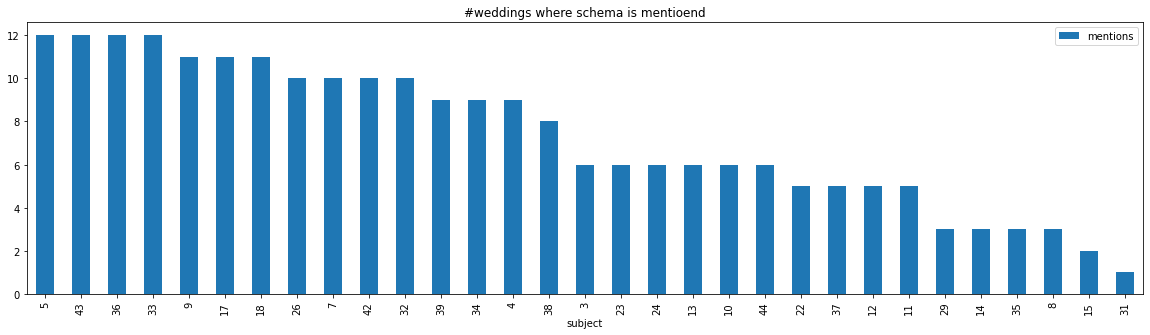

In [15]:
plt.figure(figsize=(20,5))
ax = plt.gca()
n_weddings_schema_mention = [len(i) for i in schema_mention_D.values()]
df_schema_mention = pd.DataFrame(data=n_weddings_schema_mention,
                                 index=schema_mention_D.keys(),
                                 columns=['mentions'])

df_schema_mention.sort_values('mentions',ascending=False).plot.bar(ax=ax)
ax.set_title('#weddings where schema is mentioend')
ax.set_xlabel('subject')
plt.savefig('figures/schema_count')

In [14]:
for k,v in schema_mention_D.items():
  print(v)

(6,)
(9,)
(12,)
(10,)
(3,)
(11,)
(6,)
(5,)
(5,)
(6,)
(3,)
(2,)
(11,)
(11,)
(5,)
(6,)
(6,)
(10,)
(3,)
(1,)
(10,)
(12,)
(9,)
(3,)
(12,)
(5,)
(8,)
(9,)
(10,)
(12,)
(6,)


In [75]:
group_df

,behavior,wedding,sub,time
0,0,W1,30,0
1,0,W1,30,1
2,0,W1,30,2
3,0,W1,30,3
4,0,W1,30,4
...,...,...,...,...
235,0,W38,38,235
236,0,W38,38,236
237,0,W38,38,237
238,0,W38,38,238
